# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


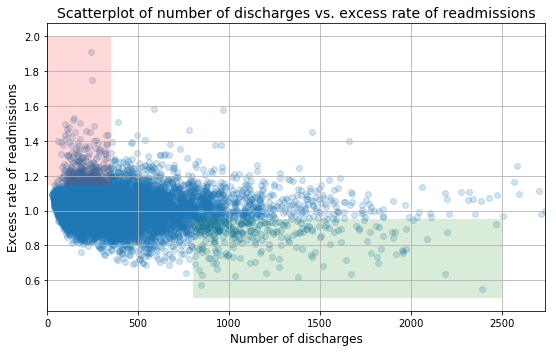

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

** A. Do you agree with the above analysis and recommendations? Why or why not? **

**A. Initial observations based on the plot above**

No,the above analysis is not that strong to say yes.With respect to the above plot visually I don't see any decreasing trend in readmissions with respect to no of discharges or unless dig little deeper into insights we can't say anything confidently.By taking small sample(talking about red and green shaded)infering conclusions based on sample ,though the sample is not representing the population.Concluding there is a 'strong correlation between hospital capacity (number of discharges) and readmission rates' but visually it appears weak, which means the conclusions are not trustworthy.As there is no proper evidence we can neither accept/agree the preliminary report nor the recommendations.

**Provide support for your arguments and your own recommendations with a statistically sound analysis:**

In [5]:
import seaborn as sns
import numpy as np
import scipy
import math
import scipy.stats as st
import statsmodels.stats.api as sms
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


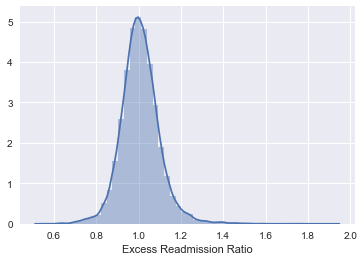

In [6]:
clean_hospital_read_df.describe()
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0].dropna(subset=['Excess Readmission Ratio'])
sns.distplot(df['Excess Readmission Ratio'])

According to the CLT excess readmission ratio is normally distriuted.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Number of samples: 11497
Mean excess readmission ratio: 1.0075


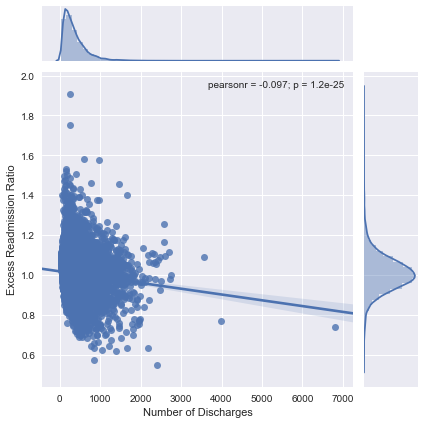

In [7]:
sns.jointplot(data=df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')
print('Number of samples: {}'.format(len(df)))
print('Mean excess readmission ratio: {:.4f}'.format(df['Excess Readmission Ratio'].mean()))

The near zero PearsonR Score(-0.097) indicates that there is no correlation between the Excess Readmission Ratio and Number of Discharges. The apparent correlation might be a result of the skew in the number of discharges.

**B. Provide support for your arguments and your own recommendations with a statistically sound analysis:**

Let's inspect the above statistical claims:

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [8]:
df_100 = df[(df['Number of Discharges'] < 100)]
print("No of samples with < 100 discharges : ",len(df_100))
print("Mean excess readmission rate : ",df_100['Excess Readmission Ratio'].mean())
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_100[df_100['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_100)) * 100))
print("")
df_1000 = df[(df['Number of Discharges'] > 1000)]
print("No of samples with > 1000 discharges : ",len(df_1000))
print("Mean excess readmission rate : ",df_1000['Excess Readmission Ratio'].mean())
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_1000[df_1000['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_1000)) * 100))

No of samples with < 100 discharges :  1188
Mean excess readmission rate :  1.0226183501683506
Percent excess readmission rate > 1: 63.22%

No of samples with > 1000 discharges :  463
Mean excess readmission rate :  0.9783354211663071
Percent excess readmission rate > 1: 44.49%


statistical claims hold true.

**Provide support for your arguments and your own recommendations with a statistically sound analysis: **

Let us look at the difference in readmission ratios between small (< 300) and large capacity hospitals.


H0: There is  NO difference in readmission ratios between small (< 300 and >=300) and large capacity hospitals

H1: There is a difference in readmission ratios between small (<300 and >= 300) and large capacity hospitals

alpha = 0.01

In [9]:
#slice into smaller capacity hospitals with no of discharges.The threshhold is 300.
df_300 = df[(df['Number of Discharges'] < 300)]
df_300_Large = df[(df['Number of Discharges'] >= 300)]


print("No of samples with < 300 discharges : ",len(df_300))
print("Mean excess readmission rate : ",df_300['Excess Readmission Ratio'].mean())
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_300[df_300['Excess Readmission Ratio'] > 1])/len(df_300)) * 100))
print("")
print("No of samples with > 300 discharges : ",len(df_300_Large))
print("Mean excess readmission rate : ",df_300_Large['Excess Readmission Ratio'].mean())
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_300_Large[df_300_Large['Excess Readmission Ratio'] > 1]) 
                                                            / len(df_300_Large)) * 100))


No of samples with < 300 discharges :  6108
Mean excess readmission rate :  1.0142382121807445
Percent excess readmission rate > 1: 53.75%

No of samples with > 300 discharges :  5389
Mean excess readmission rate :  0.9998708480237513
Percent excess readmission rate > 1: 49.29%


In smaller hospitals/facilities with number of discharges < 300, mean excess readmission rate is 1.014 and 53.75% have excess readmission rate greater than 1.Where as in larger hospitals/facilities with number of discharges >= 300, mean excess readmission rate is 0.999 and 49.25% have excess readmission rate greater than 1.

Readmission rate is high in smaller hospitals.

Now lets examine how much statistically different they are.


In [10]:
#Calculates the T-test for the means of *two independent* samples of scores
two_sample = st.ttest_ind(df_300['Excess Readmission Ratio'], 
                          df_300_Large['Excess Readmission Ratio'])

#two sample comparison
cm = sms.CompareMeans(sms.DescrStatsW(df_300['Excess Readmission Ratio']), 
                      sms.DescrStatsW(df_300_Large['Excess Readmission Ratio']))

#confidence interval for the difference in means
print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'
                      .format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                        cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))

                                        
# t-static and p-value                                       
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (0.010, 0.019).
The t-statistic is 8.384 and the p-value is 0.00000000.


Given the 99% confidence interval, t-statistic, and p-value of the two sample t-test, we can ** reject ** the null hypothesis that the mean excess readmission rate for samples with less than 300 discharges is not equal to that for samples with greater than 300 discharges. We are 99% confident that the true mean difference lies between 0.010 and 0.019. 

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers to the unlikelihood that the result is obtained by chance, i.e., probability of relationship between two variables exists. Practical significance refers to the relationship between the variables and the real world situation.

Yes they both differ here.In practical small and large hospitals are decided by no of beds,equipment,staff and other factors but in this scenario we decided based on the number of discharges which is not true in real world(as we don't have any information about these factors in our dataset). 

Due to lack of/insufficient information about the hospitals/facilities in our data set honestly we can't recommend any thing to the client.


##### Based on the scatterplot above:
**What are the advantages and disadvantages of using this plot to convey information? **

Advantages:

    1.Good Visualization and easy to understand.
    
    2.Drag attention for green and red areas.
    
Disadvantages:

    1.Data related to the shaded area is misleading(pointing to a particular area but generalizing things leads to  confusion)
    
    
#####   Construct another plot that conveys the same information in a more direct manner. 


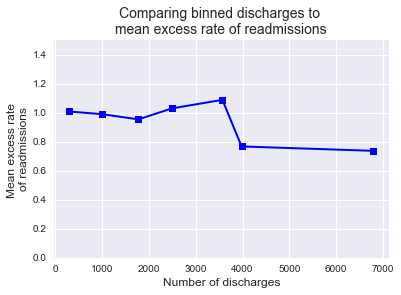

In [11]:
# Bin the data frame by 'Number of Discharges' with 10 bins
bins = np.linspace(df['Number of Discharges'].min(), 
                   df['Number of Discharges'].max(), 10)
groups = df.groupby(np.digitize(df['Number of Discharges'], bins))

#Plot the binned data by mean excess rate of readmission
plt.plot(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Number of Discharges'], 
         list(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Excess Readmission Ratio']),
         color='b', lw=2, marker='s')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Mean excess rate \nof readmissions', fontsize=12)
plt.title('Comparing binned discharges to \nmean excess rate of readmissions', fontsize=14)
plt.ylim(0,1.5);
